# Coursera Learning Programs of 2020

**Table of Contents**<a id='toc0_'></a>    
- 1. [Introduction and Domain Knowledge    ](#toc1_)    
- 2. [Preparation    ](#toc2_)    
- 3. [Data Cleaning    ](#toc3_)    
  - 3.1. [Summary on Data Quality    ](#toc3_1_)    
- 4. [Exploratory Data Analysis    ](#toc4_)    
  - 4.1. [Organizations on Coursera    ](#toc4_1_)    
    - 4.1.1. [Analysis    ](#toc4_1_1_)    
    - 4.1.2. [Summary    ](#toc4_1_2_)    
  - 4.2. [Characteristics of Available Programs    ](#toc4_2_)    
    - 4.2.1. [Analysis    ](#toc4_2_1_)    
    - 4.2.2. [Summary    ](#toc4_2_2_)    
  - 4.3. [Student Enrollment    ](#toc4_3_)    
    - 4.3.1. [Analysis  ](#toc4_3_1_)    
    - 4.3.2. [Summary  ](#toc4_3_2_)    
  - 4.4. [Popular Topics    ](#toc4_4_)    
    - 4.4.1. [Analysis  ](#toc4_4_1_)    
    - 4.4.2. [Summary  ](#toc4_4_2_)    
- 5. [Conclusions ](#toc5_)    
- 6. [Suggestions for Improvement    ](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Note that the links in the above table of contents do not work on GitHub or Google Colab. In Google Colab, please use its embedded table of contents.

## 1. <a id='toc1_'></a>Introduction and Domain Knowledge     [&#8593;](#toc0_)

In this project, I perform the analysis of *Coursera* dataset. The dataset was scraped on May, 2020; thus, the provided insights may be little outdated and should be held true only for this dataset. The aim of the analysis is to identify the characteristics of the most popular *Coursera* learning programs, offered in 2020. Additionally, some information about learning providers - organizations is given.

Though in general learning programs are called courses, the confusion between the learning program and the certificate type is avoided in this report. The dataset was scraped from the front pages of the list of learning programs offered on *Coursera*, hence the limited content. The dataset contains the following information of each learning program:
* title, 
* organization,
* certificate type,
* rating at one decimal precision,
* difficulty level, and
* approximate number of students enrolled.

## 2. <a id='toc2_'></a>Preparation     [&#8593;](#toc0_)

Import libraries for data analysis and visualization, and prepare the notebook:

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context="notebook", style="whitegrid", palette="deep", rc=custom_params)

pd.set_option("display.precision", 2)


Download the dataset from [Kaggle](https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset) if it is not already in the folder. For the method provided below to work, [Kaggle API](https://github.com/Kaggle/kaggle-api) needs to be configured on the system:

In [2]:
dataset_csv = "coursea_data.csv"

if not os.path.exists(dataset_csv):
    !kaggle datasets download --unzip siddharthm1698/coursera-course-dataset
else:
    print("Dataset already downloaded")

Dataset already downloaded


Load the dataset into `Pandas` dataframe. Inspect the structure and content of the data:

In [3]:
programs = pd.read_csv("coursea_data.csv", index_col=0)
programs.head()


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


Remove the prefix `course_` from the column names and change them into title case:

In [4]:
programs.columns = (
    programs.columns.str.replace("course_", "")
    .str.replace("_", " ")
    .str.title()
)
programs.head()


,Title,Organization,Certificate Type,Rating,Difficulty,Students Enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


Change the representation of the number of enrolled students from `string` to `numeric` value. Also, remove the upper case for the certificate type for consistency:

In [5]:
programs["Students Enrolled"] = (
    programs["Students Enrolled"]
    .replace({"k": "*1e3", "m": "*1e6"}, regex=True)
    .map(pd.eval)
    .astype(int)
)
programs["Certificate Type"] = programs["Certificate Type"].str.title()
programs.head()


,Title,Organization,Certificate Type,Rating,Difficulty,Students Enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,Specialization,4.7,Beginner,5300
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,4.7,Intermediate,17000
874,A Crash Course in Data Science,Johns Hopkins University,Course,4.5,Mixed,130000
413,A Law Student's Toolkit,Yale University,Course,4.7,Mixed,91000
635,A Life of Happiness and Fulfillment,Indian School of Business,Course,4.8,Mixed,320000


Check if data are represented with appropriate types:

In [6]:
programs.dtypes


Title                 object
Organization          object
Certificate Type      object
Rating               float64
Difficulty            object
Students Enrolled      int32
dtype: object

## 3. <a id='toc3_'></a>Data Cleaning     [&#8593;](#toc0_)

I this section, I will check the data for missing values, duplicate samples and outliers.

Check if any value in any column is missing:

In [7]:
programs.isnull().any()


Title                False
Organization         False
Certificate Type     False
Rating               False
Difficulty           False
Students Enrolled    False
dtype: bool

Check if any observation in the dataset is duplicate:

In [8]:
programs.duplicated().any()


False

Repetition of organizations, certificate types, ratings, difficulty levels and even the numbers of enrolled students (since the estimate is approximate) are expected. However, all titles should be unique:

In [9]:
print(f"{programs['Title'].nunique()/len(programs.index)*100:.2f}%")


99.66%


Some titles are duplicated because they refer to different certificates offered (either course or  specialization). This is not an issue with the data. 

In [10]:
programs[programs["Title"].duplicated(False)]


,Title,Organization,Certificate Type,Rating,Difficulty,Students Enrolled
756,Developing Your Musicianship,Berklee College of Music,Course,4.8,Mixed,41000
205,Developing Your Musicianship,Berklee College of Music,Specialization,4.8,Beginner,54000
181,Machine Learning,University of Washington,Specialization,4.6,Intermediate,290000
6,Machine Learning,Stanford University,Course,4.9,Mixed,3200000
241,Marketing Digital,Universidade de São Paulo,Course,4.8,Beginner,81000
325,Marketing Digital,Universidad Austral,Specialization,4.7,Beginner,39000


Check the available types of certificates:

In [11]:
print(programs["Certificate Type"].unique())


['Specialization' 'Course' 'Professional Certificate']


Check difficulty levels:

In [12]:
print(programs["Difficulty"].unique())


['Beginner' 'Intermediate' 'Mixed' 'Advanced']


Check the range of the numeric values:

In [13]:
programs[["Rating", "Students Enrolled"]].aggregate(["min", "max"])


,Rating,Students Enrolled
min,3.3,1500
max,5.0,3200000


### 3.1. <a id='toc3_1_'></a>Summary on Data Quality     [&#8593;](#toc0_)

The dataset of *Coursera* learning programs from Kaggle is reliable as it contains no missing values and numerical information is within reasonable ranges.  Categorical information regarding certificate types and difficulty levels is also eligible.

## 4. <a id='toc4_'></a>Exploratory Data Analysis     [&#8593;](#toc0_)

The *Coursera* dataset contains:

In [14]:
print(f"{len(programs.index)} entry in total.")


891 entry in total.


Interestingly, it is one observation more than reported by the dataset creator.

### 4.1. <a id='toc4_1_'></a>Organizations on Coursera     [&#8593;](#toc0_)

In this section, I will explore organizations offering learning programs on *Coursera*. Most popular and best rated organizations will be identified. Also, distinction between academic and nonacademic organizations will be explored.

#### 4.1.1. <a id='toc4_1_1_'></a>Analysis     [&#8593;](#toc0_)

Example of organizations offering learning programs on *Coursera*:

In [15]:
programs["Organization"][:10]


134                        (ISC)²
743    University of Pennsylvania
874      Johns Hopkins University
413               Yale University
635     Indian School of Business
661         University at Buffalo
54                deeplearning.ai
488               deeplearning.ai
58                            IBM
129               deeplearning.ai
Name: Organization, dtype: object

The number of different organizations:

In [16]:
programs["Organization"].nunique()


154

Some organizations are academic institutions while others are not. It might be interesting to see, how popularity and ratings compare between these two types of organizations. For that purpose, the dataset is augmented with an additional column:

In [17]:
searchfor = [
    "Universi",
    "College",
    "School",
    "Institut",
    "École",
    "Tecnológico",
    "HEC",
]
# Look for the common words in an organization title indicating that
# it is an academic institution. Exclude Institute for the Future.
programs["Organization Type"] = "Nonacademic"
academic_mask = programs["Organization"].str.contains(
    "|".join(searchfor), case=False
) & ~programs["Organization"].str.contains("future", case=False)
programs.loc[academic_mask, "Organization Type"] = "Academic"
programs.head()


,Title,Organization,Certificate Type,Rating,Difficulty,Students Enrolled,Organization Type
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,Specialization,4.7,Beginner,5300,Nonacademic
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,4.7,Intermediate,17000,Academic
874,A Crash Course in Data Science,Johns Hopkins University,Course,4.5,Mixed,130000,Academic
413,A Law Student's Toolkit,Yale University,Course,4.7,Mixed,91000,Academic
635,A Life of Happiness and Fulfillment,Indian School of Business,Course,4.8,Mixed,320000,Academic


The number of academic and nonacademic organizations offering learning programs on *Coursera*:

In [18]:
no_organizations = programs.groupby("Organization Type")[
    "Organization"
].nunique()
no_organizations


Organization Type
Academic       116
Nonacademic     38
Name: Organization, dtype: int64

Nonacademic organizations on *Coursera*:

In [19]:
print(
    programs[programs["Organization Type"] == "Nonacademic"][
        "Organization"
    ].unique()
)


['(ISC)²' 'deeplearning.ai' 'IBM' 'Amazon Web Services' 'Google Cloud'
 'Atlassian' 'ScrumTrek' 'The Museum of Modern Art'
 'National Arts Strategies' 'Autodesk' 'Google - Spectrum Sharing'
 'INSEAD' 'ConsenSys Academy' 'Osmosis' 'Cisco' 'LearnQuest' 'Google'
 'PwC' 'Ticket for Change' 'American Museum of Natural History'
 'Institute for the Future' 'Sciences Po' 'Bloomsbury Learning Exchange'
 'SAS' 'Automation Anywhere' 'Kalshoven-Gieskes Forum' 'JetBrains'
 'Cloudera' 'VMware' 'The Linux Foundation' 'Palo Alto Networks'
 'MathWorks' 'E-Learning Development Fund' 'BCG' 'HubSpot Academy'
 'Crece con Google' 'Unity' 'Mail.Ru Group']


The proportion of students enrolled and learning programs offered by academic and nonacademic organizations:

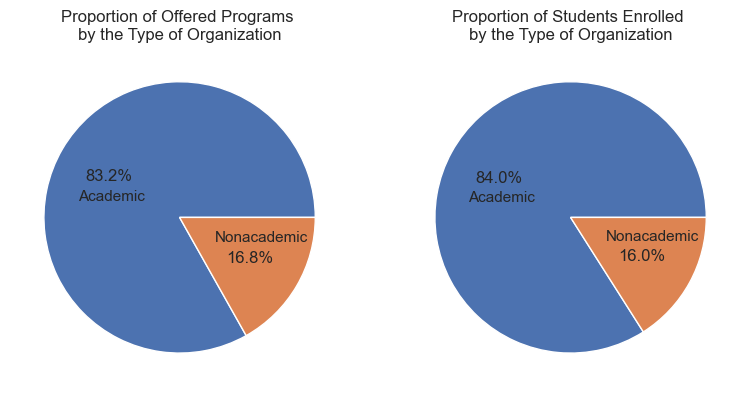

In [20]:
no_programs = programs["Organization Type"].value_counts()

pie_params = dict(
    labels=["Academic", "Nonacademic"],
    autopct="%1.1f%%",
    pctdistance=0.6,
    labeldistance=0.3,
)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].pie(x=no_programs, **pie_params)
axs[0].set_title(
    "Proportion of Offered Programs \nby the Type of Organization"
)
axs[1].pie(
    x=programs.groupby("Organization Type")["Students Enrolled"].sum(),
    **pie_params,
)
axs[1].set_title(
    "Proportion of Students Enrolled \nby the Type of Organization"
)
plt.tight_layout()
plt.show()


The average rating of the program does not differ too much by the type of organization:

In [21]:
programs.groupby("Organization Type")["Rating"].mean()


Organization Type
Academic       4.68
Nonacademic    4.66
Name: Rating, dtype: float64

However, academic organizations offer more programs per organization on average:

In [22]:
no_programs / no_organizations


Academic       6.39
Nonacademic    3.95
dtype: float64

An aggregated dataframe with organization-specific information is created:

In [23]:
organizations_df = programs.groupby("Organization").agg(
    programs_offered=("Organization", "count"),
    total_students_enrolled=("Students Enrolled", "sum"),
    mean_rating=("Rating", "mean"),
    organization_type=("Organization Type", lambda x: x.values[0]),
)


This shows the top organizations offering most learning programs on *Coursera*:

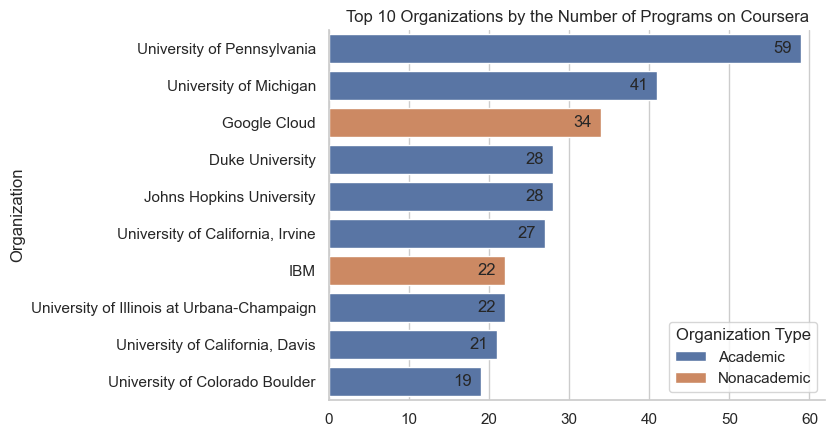

In [24]:
bar_params = dict(
    hue="organization_type", hue_order=["Academic", "Nonacademic"], dodge=False
)
bar_legend_params = dict(title="Organization Type", loc="lower right")

ax = sns.barplot(
    data=organizations_df,
    y=organizations_df.index,
    x="programs_offered",
    order=organizations_df["programs_offered"].nlargest(10).index,
    **bar_params,
)
for i in ax.containers:
    ax.bar_label(i, padding=-20)
ax.set_xlabel("")
ax.legend(**bar_legend_params)
plt.title("Top 10 Organizations by the Number of Programs on Coursera")
plt.show()


However, the top list changes if accounting for the total number of students enrolled in an offered programs.

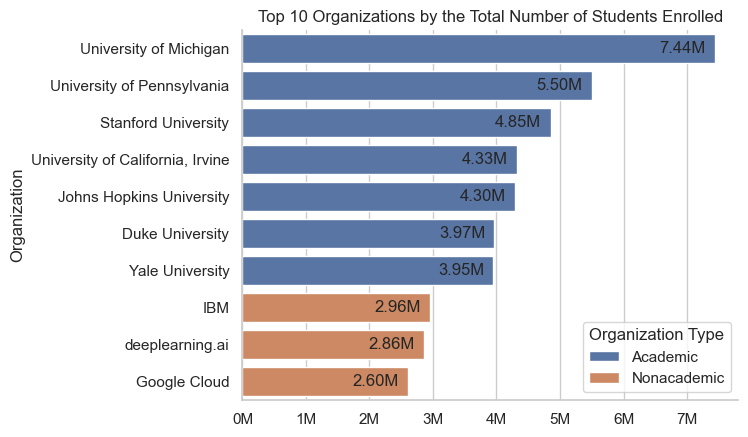

In [25]:
ax = sns.barplot(
    data=organizations_df,
    y=organizations_df.index,
    x="total_students_enrolled",
    order=organizations_df["total_students_enrolled"].nlargest(10).index,
    **bar_params,
)
for i in ax.containers:
    ax.bar_label(
        i, labels=[f"{x/1e6:.2f}M" for x in i.datavalues], padding=-40
    )
ax.set_xlabel("")
ax.xaxis.set_major_formatter(lambda x, pos: f"{x/1e6:.0f}M")
ax.legend(**bar_legend_params)
plt.title("Top 10 Organizations by the Total Number of Students Enrolled")
plt.show()


Average ratings for organizations offering at least 10 programs on *Coursera*:

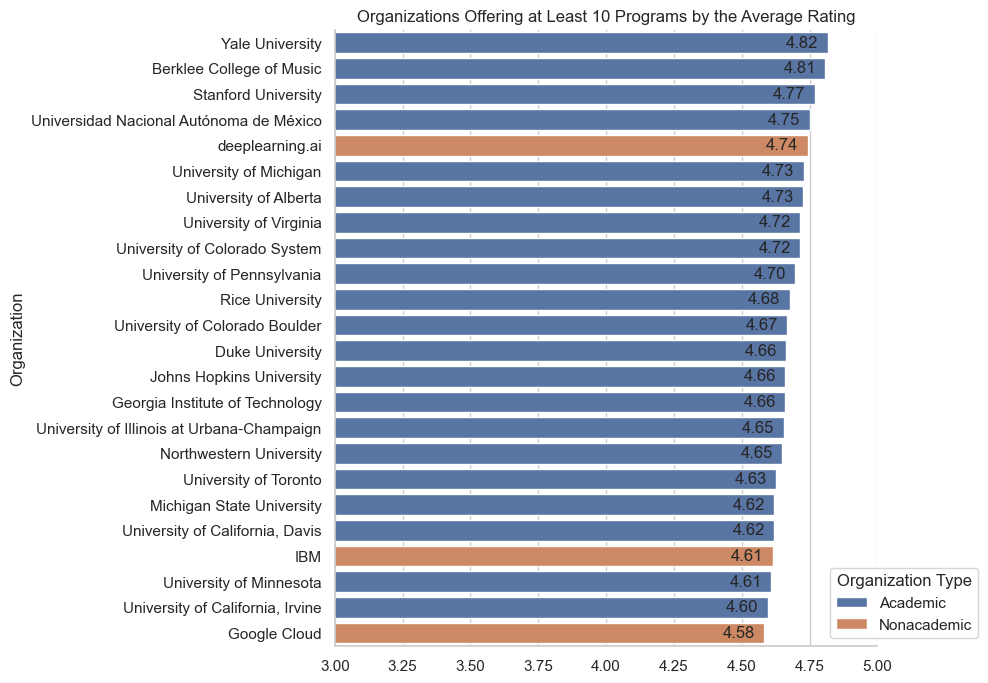

In [26]:
organizations_df_many_programs = organizations_df[
    organizations_df["programs_offered"] >= 10
]
plt.figure(figsize=(7, 8))
ax = sns.barplot(
    data=organizations_df_many_programs,
    y=organizations_df_many_programs.index,
    x="mean_rating",
    order=organizations_df_many_programs["mean_rating"]
    .sort_values(ascending=False)
    .index,
    **bar_params,
)
for i in ax.containers:
    ax.bar_label(i, fmt="%.2f", padding=-30)
ax.set_xlabel("")
ax.legend(**bar_legend_params, bbox_to_anchor=(1.2, 0))
ax.set_xlim([3, 5])  # the minimum rating in the dataset is 3.3
plt.title("Organizations Offering at Least 10 Programs by the Average Rating")
plt.show()


#### 4.1.2. <a id='toc4_1_2_'></a>Summary     [&#8593;](#toc0_)

* There are 154 different organizations in this dataset. Only 38 of them are nonacademic. Therefore academic organizations account for the majority of learning programs offered (83.2%) and students enrolled (84.0%) on the *Coursera* platform in 2020.
* On average, academic and nonacademic organizations offer 6.39 and 3.95 programs per entity. The average rating of the programs does not differ based on the type of organization.
* The leader in learning program offering is *University of Pennsylvania* with 59 programs on *Coursera*. It is followed by *University of Michigan* with 41 program.
* However, the places are switched for the top student attractors. Programs by *University of Michigan* have 7.44M students enrolled, while programs by *University of Pennsylvania* – 5.50M. Interestingly, *Stanford University*, which is not one of the top 10 program providers, is in the 3rd place by the number of students enrolled (4.85M).
* Average ratings for the organizations offering at least 10 programs on *Coursera* range from 4.58 to 4.82. Only *Yale University* and *Berklee College of Music* have the average rating above 4.8.
* As nonacademic organizations, *IBM*, *deeplearning.ai* and *Google Cloud* add substantially to the student enrollment at *Coursera*.  *Google Cloud* and *IBM* offer 34 and 22 programs, respectively. *deeplearning.ai* stands out as one of the best rated organizations.

### 4.2. <a id='toc4_2_'></a>Characteristics of Available Programs     [&#8593;](#toc0_)

In this section, I will analyze the certificate types and difficulty levels of the programs on *Coursera*. Also, ratings will be explored to identify best-rated program groups and individual programs.

#### 4.2.1. <a id='toc4_2_1_'></a>Analysis     [&#8593;](#toc0_)

Two thirds of the programs on *Coursera* enable learners to earn the course certificate. Programs offering professional certificates are scarce in this *Coursera* dataset.

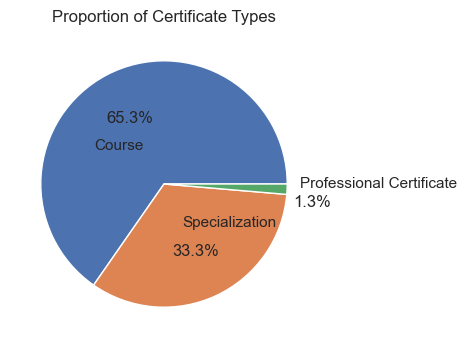

In [27]:
pie_params = dict(
    labels=["Course", "Specialization", "Professional Certificate"],
    autopct="%1.1f%%",
    pctdistance=0.6,
    labeldistance=0.35,
)
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(
    x=programs["Certificate Type"].value_counts(), **pie_params
)
autotexts[-1].set_position((1.2, -0.15))
texts[-1].set_position((1.1, 0))
plt.title("Proportion of Certificate Types")
plt.show()


The majority (487) of programs are suitable for beginners. The difficulty level of other programs is either intermediate (198) or mixed (187). Only 19 programs are offered for advanced learners.

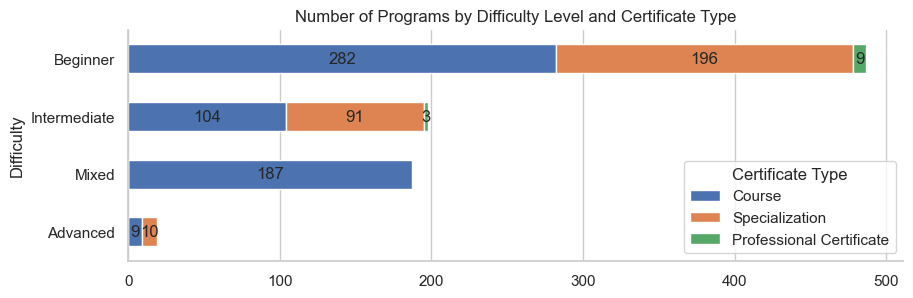

In [28]:
grouped_certificate_difficulty = (
    programs.groupby(["Difficulty", "Certificate Type"])
    .size()
    .reset_index()
    .pivot(columns="Certificate Type", index="Difficulty", values=0)
)
grouped_certificate_difficulty.columns = pd.CategoricalIndex(
    grouped_certificate_difficulty.columns.values,
    ordered=True,
    categories=["Course", "Specialization", "Professional Certificate"],
)
grouped_certificate_difficulty.sort_index(axis=1, inplace=True)
grouped_certificate_difficulty.index = pd.CategoricalIndex(
    grouped_certificate_difficulty.index,
    ordered=True,
    categories=["Advanced", "Mixed", "Intermediate", "Beginner"],
)
grouped_certificate_difficulty.sort_index(axis=0, inplace=True)

ax = grouped_certificate_difficulty.plot.barh(stacked=True, figsize=(10, 3))
for bar in ax.patches:
    if bar.get_width() != 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y(),
            f"{bar.get_width():.0f}",
            va="center",
            ha="center",
        )

ax.yaxis.grid(False)
ax.legend(title="Certificate Type")
plt.title("Number of Programs by Difficulty Level and Certificate Type")
plt.show()


The median value of ratings does not differ based on difficulty level. Only programs of mixed difficulty level have a bit higher median rating. However, one program at this difficulty level has a particularly low rating of 3.3.

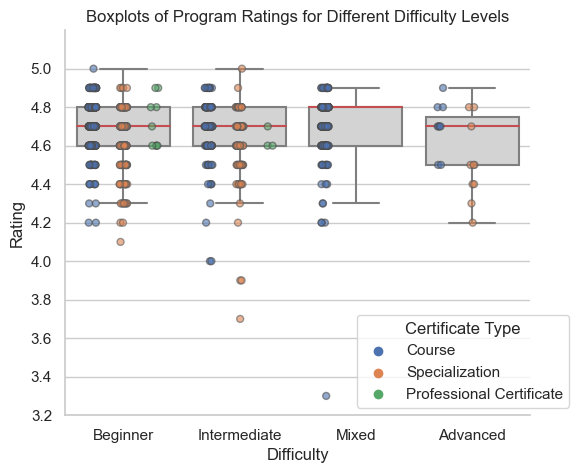

In [29]:
median_params = dict(color=sns.color_palette()[3], linewidth=1.5)
box_params = dict(ylim=(3.2, 5.2), yticks=np.arange(3.2, 5.2, 0.2))

fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(
    ax=ax,
    data=programs,
    x="Difficulty",
    y="Rating",
    color="lightgrey",
    fliersize=0,
    medianprops=median_params,
)
sns.stripplot(
    ax=ax,
    data=programs,
    x="Difficulty",
    y="Rating",
    hue="Certificate Type",
    hue_order=["Course", "Specialization", "Professional Certificate"],
    dodge=True,
    alpha=0.6,
    linewidth=1,
)
ax.set(**box_params)
ax.legend(loc="lower right", title="Certificate Type", bbox_to_anchor=(1.1, 0))
plt.title("Boxplots of Program Ratings for Different Difficulty Levels")
plt.show()


In [30]:
programs.groupby("Difficulty")["Rating"].agg(
    ["mean", "median", "min", "max", "count"]
).sort_values("count", ascending=False)


,mean,median,min,max,count
Difficulty,,,,,
Beginner,4.68,4.7,4.1,5.0,487
Intermediate,4.65,4.7,3.7,5.0,198
Mixed,4.71,4.8,3.3,4.9,187
Advanced,4.60,4.7,4.2,4.9,19


Ratings among programs offering specialization certificates are lower than among programs offering course certificates. Interestingly, no program offering professional certificate has a rating lower than 4.6.

C:\Users\birut\AppData\Local\Temp\ipykernel_11076\943635514.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


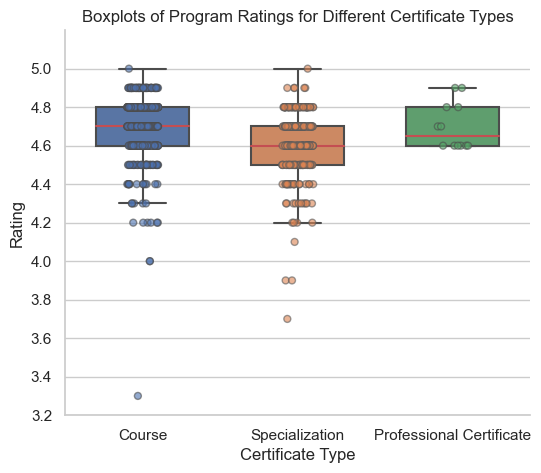

In [31]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(
    data=programs,
    x="Certificate Type",
    y="Rating",
    width=0.6,
    fliersize=0,
    medianprops=median_params,
    order=["Course", "Specialization", "Professional Certificate"],
)
sns.stripplot(
    data=programs,
    x="Certificate Type",
    y="Rating",
    alpha=0.6,
    linewidth=1,
    palette="deep",
    order=["Course", "Specialization", "Professional Certificate"],
)
ax.set(**box_params)
plt.title("Boxplots of Program Ratings for Different Certificate Types")
plt.show()


In [32]:
programs.groupby("Certificate Type")["Rating"].agg(
    ["mean", "median", "min", "max", "count"]
).sort_values("count", ascending=False)


,mean,median,min,max,count
Certificate Type,,,,,
Course,4.71,4.70,3.3,5.0,582
Specialization,4.62,4.60,3.7,5.0,297
Professional Certificate,4.70,4.65,4.6,4.9,12


These are the programs allowing to a earn professional certificate. Most of them are offered by nonacademic organizations, such as *Google*, *Google Cloud*, *IBM*, *SAS*.

In [33]:
programs.loc[
    programs["Certificate Type"] == "Professional Certificate"
].sort_values("Organization")


,Title,Organization,Certificate Type,Rating,Difficulty,Students Enrolled,Organization Type
56,Arizona State University TESOL,Arizona State University,Professional Certificate,4.9,Beginner,150000,Academic
363,Soporte de Tecnologías de la Información de Go...,Crece con Google,Professional Certificate,4.9,Beginner,8800,Nonacademic
25,Google IT Automation with Python,Google,Professional Certificate,4.7,Beginner,93000,Nonacademic
4,Google IT Support,Google,Professional Certificate,4.8,Beginner,350000,Nonacademic
9,Cloud Engineering with Google Cloud,Google Cloud,Professional Certificate,4.7,Intermediate,310000,Nonacademic
22,Data Engineering with Google Cloud,Google Cloud,Professional Certificate,4.6,Intermediate,120000,Nonacademic
34,IBM AI Engineering,IBM,Professional Certificate,4.6,Intermediate,140000,Nonacademic
12,IBM Applied AI,IBM,Professional Certificate,4.6,Beginner,220000,Nonacademic
0,IBM Data Science,IBM,Professional Certificate,4.6,Beginner,480000,Nonacademic
160,SAS Programmer,SAS,Professional Certificate,4.8,Beginner,370000,Nonacademic


Ratings bellow 4.2 are uncommon and probably indicate poor teaching quality. Such programs in this dataset are:

In [34]:
programs.loc[programs["Rating"] < 4.2].sort_values(
    ["Rating", "Students Enrolled"]
)


,Title,Organization,Certificate Type,Rating,Difficulty,Students Enrolled,Organization Type
767,How To Create a Website in a Weekend! (Project...,The State University of New York,Course,3.3,Mixed,140000,Academic
352,Machine Learning and Reinforcement Learning in...,New York University,Specialization,3.7,Intermediate,29000,Academic
178,Machine Learning for Trading,Google Cloud,Specialization,3.9,Intermediate,15000,Nonacademic
779,iOS App Development with Swift,University of Toronto,Specialization,3.9,Intermediate,76000,Academic
659,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,Course,4.0,Intermediate,13000,Academic
873,Mathematics for Machine Learning: PCA,Imperial College London,Course,4.0,Intermediate,33000,Academic
609,How to Start Your Own Business,Michigan State University,Specialization,4.1,Beginner,34000,Academic


A quick look through the reviews for the worst-rated learning program indicates that the rating is closely related to no video tutoring being involved in the course. 

Only two programs have maximum rating of 5.0. However, student enrollment in both of these programs are low.

In [35]:
programs.loc[programs["Rating"] == 5]


,Title,Organization,Certificate Type,Rating,Difficulty,Students Enrolled,Organization Type
789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,Course,5.0,Beginner,1500,Academic
401,Infectious Disease Modelling,Imperial College London,Specialization,5.0,Intermediate,1600,Academic


#### 4.2.2. <a id='toc4_2_2_'></a>Summary     [&#8593;](#toc0_)

* The majority of learning programs on *Coursera* offer course certificates (65.3%). One third offer specialization certificates, and the rest - professional certificates.
* More than a half of programs (487/891) are offered at the beginner level. Another 198 programs are offered at the intermediate level. These are both: courses and specializations.  At the mixed difficulty level (187), only programs with the course certificates are offered. Nineteen programs (9 courses and 10 specializations) are offered for advanced learners.
* Program ratings do not differ much between difficulty levels. However, courses are rated higher than specializations, on average. The minimum rating for programs with professional certification (mostly offered by nonacademic organizations) is 4.6.
* The worst-rated learning program in this dataset is *How To Create a Website in a Weekend! (Project-Centered Course)* course by The State University of New York.
* Top-rated programs in this dataset are *El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho* (en. *The Lawyer of the Future: Legaltech and the Digital Transformation of Law*) by Universidad Austral and *Infectious Disease Modelling* by Imperial College London. However, these programs did not have many students enrolled at the time of data collection.

### 4.3. <a id='toc4_3_'></a>Student Enrollment     [&#8593;](#toc0_)

In this section, I will analyze the enrollment data of *Coursera* programs to see common trends in the popularity of learning programs.

#### 4.3.1. <a id='toc4_3_1_'></a>Analysis   [&#8593;](#toc0_)

There are more than 80M student enrollment cases in this dataset. The enrollment per program ranges from 1.5K to 3.2M students. However, the median value is 42K students and the enrollment for the middle 50% of programs ranges from 17.5K to 99.5K.

In [36]:
programs["Students Enrolled"].agg(
    {
        "Total": "sum",
        "Minimum": "min",
        "25th Percentile": lambda x: x.quantile(0.25),
        "Median": "median",
        "75th Percentile": lambda x: x.quantile(0.75),
        "Maximum": "max",
    }
).apply("{0:.0f}".format)


Total              80681900
Minimum                1500
25th Percentile       17500
Median                42000
75th Percentile       99500
Maximum             3200000
Name: Students Enrolled, dtype: object

The histogram of student enrollment is highly skewed as most of the programs have a relatively small number of students enrolled.

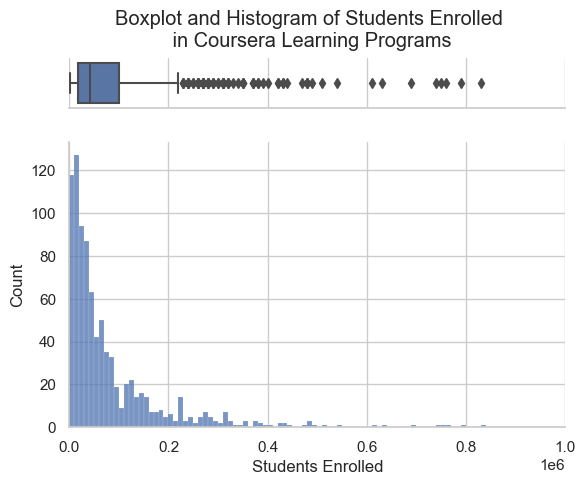

In [37]:
fig, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}
)

sns.boxplot(data=programs, x="Students Enrolled", ax=ax_box)
sns.histplot(
    data=programs,
    x="Students Enrolled",
    bins=np.arange(0, 1e6, 1e4),
    ax=ax_hist,
)

ax_box.set(yticks=[], xlim=(0, 1e6), xlabel="")
ax_hist.set(xlim=(0, 1e6))
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.suptitle(
    "Boxplot and Histogram of Students Enrolled\n in Coursera Learning Programs"
)
plt.show()


Only a couple of programs have more that a million students enrolled:

In [38]:
programs.loc[programs["Students Enrolled"] >= 1e6].sort_values(
    "Students Enrolled", ascending=False
)


,Title,Organization,Certificate Type,Rating,Difficulty,Students Enrolled,Organization Type
6,Machine Learning,Stanford University,Course,4.9,Mixed,3200000,Academic
2,The Science of Well-Being,Yale University,Course,4.9,Mixed,2500000,Academic
3,Python for Everybody,University of Michigan,Specialization,4.8,Beginner,1500000,Academic
47,Programming for Everybody (Getting Started wit...,University of Michigan,Course,4.8,Mixed,1300000,Academic


The most popular course is *Machine Learning* by Stanford University. This might partially explain how this university has 4.85M students enrolled in total. The most popular specialization is *Python for Everybody* by University of Michigan. Interestingly, the 2nd most popular course is not related to technology but to well-being (*The Science of Well-Being* by Yale University).

Close to a half of enrollments belong to beginner programs. Interestingly, more students are enrolled in mixed difficulty programs than intermediate programs.

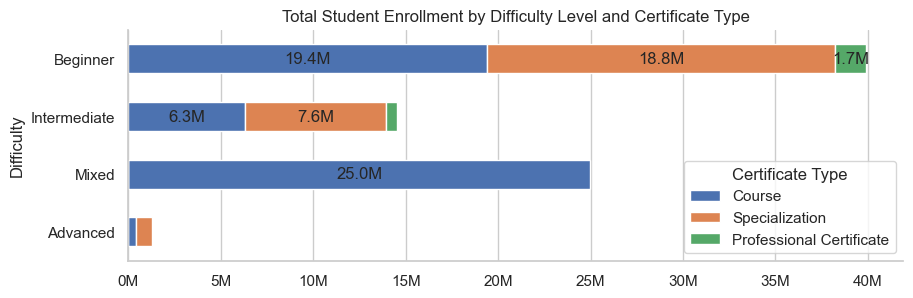

In [39]:
grouped_certificate_difficulty_enrollment = (
    programs.groupby(["Difficulty", "Certificate Type"])["Students Enrolled"]
    .sum()
    .reset_index()
    .pivot(
        columns="Certificate Type",
        index="Difficulty",
        values="Students Enrolled",
    )
)
grouped_certificate_difficulty_enrollment.columns = pd.CategoricalIndex(
    grouped_certificate_difficulty_enrollment.columns.values,
    ordered=True,
    categories=["Course", "Specialization", "Professional Certificate"],
)
grouped_certificate_difficulty_enrollment.sort_index(axis=1, inplace=True)
grouped_certificate_difficulty_enrollment.index = pd.CategoricalIndex(
    grouped_certificate_difficulty_enrollment.index,
    ordered=True,
    categories=["Advanced", "Mixed", "Intermediate", "Beginner"],
)
grouped_certificate_difficulty_enrollment.sort_index(axis=0, inplace=True)

ax = grouped_certificate_difficulty_enrollment.plot.barh(
    stacked=True, figsize=(10, 3)
)
for bar in ax.patches:
    if bar.get_width() >= 1e6:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y(),
            f"{bar.get_width()/1e6:.1f}M",
            va="center",
            ha="center",
        )

ax.yaxis.grid(False)
ax.xaxis.set_major_formatter(lambda x, pos: f"{x/1e6:.0f}M")
ax.legend(title="Certificate Type")
plt.title("Total Student Enrollment by Difficulty Level and Certificate Type")
plt.show()


The average number of students enrolled per program shows that programs with professional certificates are largest in general. They are followed by the mixed difficulty level courses. Least popular are advanced courses.

In [40]:
enrollment_per_program = (
    grouped_certificate_difficulty_enrollment / grouped_certificate_difficulty
)
enrollment_per_program.style.background_gradient(
    cmap="OrRd", axis=None, vmin=0, vmax=2e5
).format(precision=0)


,Course,Specialization,Professional Certificate
Difficulty,,,
Advanced,45189,85770,nan
Mixed,133633,nan,nan
Intermediate,60805,83655,190000
Beginner,68835,95877,190933


#### 4.3.2. <a id='toc4_3_2_'></a>Summary   [&#8593;](#toc0_)

* *Coursera* platform had over 80M student enrollment cases at the moment of dataset collection. However, the median number students enrolled per program is 42K students and 75% of programs have less than 100K students enrolled.
* There are 4 programs with more than a million students enrolled. *Machine Learning* course is the most popular and has 3.2M students enrolled.
* Mixed difficulty level courses are the most popular among courses and specializations. Though programs with professional certificates are scarce, they are the most popular with 190K students enrolled per program on average.

### 4.4. <a id='toc4_4_'></a>Popular Topics     [&#8593;](#toc0_)

In this section, I will analyze popular topics in terms of how often they are mentioned in the program titles on *Coursera*. Based on the most frequent words and phrases, student enrollment in these topics will be calculated.

#### 4.4.1. <a id='toc4_4_1_'></a>Analysis   [&#8593;](#toc0_)

For the sake of simplicity, only titles composed of ASCII printable characters are considered. This way mostly English courses are analyzed, and courses in Russian or Spanish are ignored. To enable analysis, punctuation marks are removed and all titles are joined to a one long string.

In [41]:
text = programs[programs["Title"].str.contains("^[\u0020-\u007E]*$")][
    "Title"
].tolist()
text = " ".join(text).lower().replace(f"[{string.punctuation}]", "")


Most common words and bigrams (collocations of two words) are visualized in a world cloud. Here, such words as "introduction", "fundamentals", "foundations", and "started" are ignored.

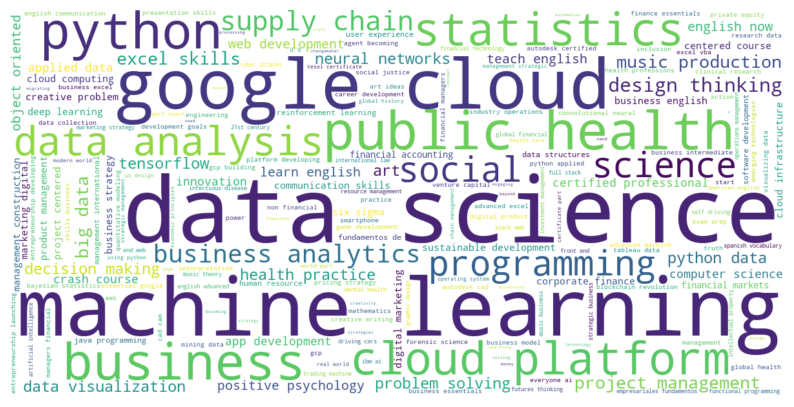

In [42]:
stopwords = set(STOPWORDS)
stopwords.update(["introduction", "fundamentals", "foundations", "started"])

wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="white",
    width=1200,
    height=600,
    collocation_threshold=5,
    colormap="viridis",
).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


It seems that a lot of programs in English are related to data science, machine learning, Google cloud computing, public health, business, Python, etc.

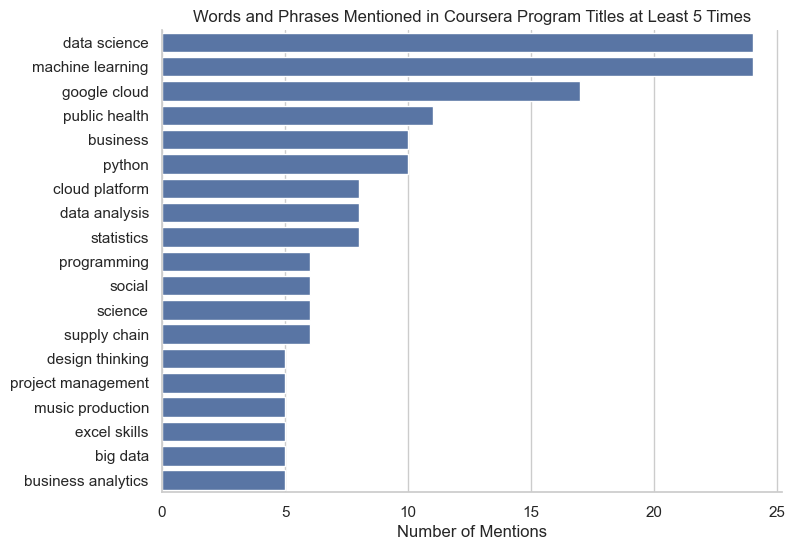

In [43]:
word_freq = pd.Series(wordcloud.process_text(text)).sort_values(
    ascending=False
)
word_freq5 = word_freq[word_freq >= 5]

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    y=word_freq5.index,
    x=word_freq5.values,
    color=sns.color_palette()[0],
)
plt.title(
    "Words and Phrases Mentioned in Coursera Program Titles at Least 5 Times"
)
plt.xlabel("Number of Mentions")
plt.show()


To see how popular are topics mentioned at least 10 times, I will sum the number of students enrolled in related programs. However, these estimates could be overlapping because some titles can include more than one popular phrase. Also, it is important to keep in mind that this shows popularity among English-speaking learners only.

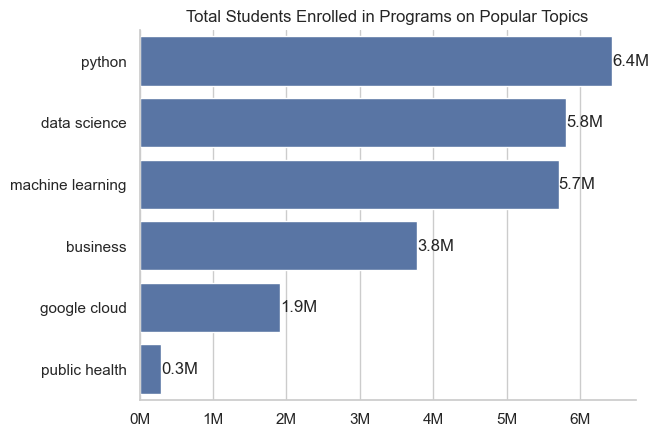

In [44]:
phrases = word_freq[word_freq >= 10].index.to_list()
enrollment_phrases = pd.Series(dtype=int)
for phrase in phrases:
    enrollment_phrases[phrase] = programs[
        programs["Title"].str.contains(phrase, case=False)
    ]["Students Enrolled"].sum()
enrollment_phrases = enrollment_phrases.sort_values(ascending=False)

ax = sns.barplot(
    y=enrollment_phrases.index,
    x=enrollment_phrases.values,
    color=sns.color_palette()[0],
)
for i in ax.containers:
    ax.bar_label(i, labels=[f"{x/1e6:.1f}M" for x in i.datavalues], padding=0)
ax.xaxis.set_major_formatter(lambda x, pos: f"{x/1e6:.0f}M")
plt.title("Total Students Enrolled in Programs on Popular Topics")
plt.show()


#### 4.4.2. <a id='toc4_4_2_'></a>Summary   [&#8593;](#toc0_)

* Many programs in English on *Coursera* offer content to learn skills for data science, machine learning, Google cloud computing, Python, business, and public health.
* Since the top-enrolled program is on machine learning, and two other over-the-million programs are on Python, unsurprisingly these topics have over 5M students each. Data science is another very popular topic in terms of student enrollment.
* Out of topics not identified by technological terms, business is the most popular.

## 5. <a id='toc5_'></a>Conclusions  [&#8593;](#toc0_)

1. The available dataset of *Coursera* learning programs is reliable as it contains no missing values or extreme outliers. However, the numeric data is approximated. The dataset is 3 years old and the insights obtained from it are a bit outdated.
2. The majority of organizations offering learning programs on *Coursera* are academic institutions (116/154). University of Pennsylvania offers the highest number of programs (59). University of Michigan has the most students enrolled in its programs (7.44M). Yale University has the highest average rating (4.8) among organizations offering at least 10 programs. *IBM*, *deeplearning.ai* and *Google Cloud* are nonacademic organizations contributing substantially to the *Coursera* platform.
3. Course certificates are offered by 65.3% of programs on *Coursera*. Other programs mostly offer specialization certificates (33.3%), and just 1.3% of programs offer professional certificates. More than a half of programs (487/891) are offered at the beginner level, and only 19 programs are offered for advanced learners. Program ratings do not differ much between difficulty levels. However, courses are rated higher than specializations, on average. 
4. The dataset contains information on 80M student enrollment cases. However, 75% of programs have less than 100K students enrolled. The outstanding program in terms of student enrollment is *Machine Learning* by Stanford University (3.2M). On average, programs offering professional certificates are the most popular (190K students enrolled per program).
5. Topics related to data science, machine learning and python are very popular among *Coursera* programs. This trend probably remains true at the moment of the dataset analysis in 2023.

## 6. <a id='toc6_'></a>Suggestions for Improvement     [&#8593;](#toc0_)

The analysis *Coursera* learning programs could be improved in a couple of different ways:
* The dataset could be updated since there are more than 10K programs offered on *Coursera* at the moment.
* The number of reviews should be accounted for to reliably interpreter the ratings. The number of students enrolled is not suitable for this task because enrollment not necessarily correspond to the number of reviews provided.
* The success of the learning program could be based on the number of paying learners or the number of learners successfully finishing the program. The number of students enrolled not necessarily show the success of the learning program.
* Information about the link between courses and specializations could be included to see if students are enrolled in some courses just because they are enrolled in corresponding specializations.